In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
data = pd.read_csv('asset_data_18092025.csv')

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24197 entries, 0 to 24196
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   household_id      24197 non-null  object
 1   asset_id          24197 non-null  object
 2   alias             24195 non-null  object
 3   asset_status      24197 non-null  bool  
 4   asset_type        24197 non-null  object
 5   created_ts        24197 non-null  object
 6   device_groups     24194 non-null  object
 7   hub_id            859 non-null    object
 8   last_updated_by   16078 non-null  object
 9   last_updated_ts   24197 non-null  object
 10  manufacturer      24197 non-null  object
 11  firmware_version  23934 non-null  object
 12  serial_number     24197 non-null  object
 13  soft_deleted      24197 non-null  bool  
 14  asset_disco_ts    2027 non-null   object
dtypes: bool(2), object(13)
memory usage: 2.4+ MB


In [42]:
data.describe()

,household_id,asset_id,alias,asset_status,asset_type,created_ts,device_groups,hub_id,last_updated_by,last_updated_ts,manufacturer,firmware_version,serial_number,soft_deleted,asset_disco_ts
count,24197,24197,24195,24197,24197,24197,24194,859,16078,24197,24197,23934,24197,24197,2027
unique,14064,21757,4942,1,11,22149,15621,222,4,22793,9,47,21698,2,1515
top,01JKVRNR29PTJW5Q321AHQDJSH,db-C0F53587DE88,Outdoor Camera,True,telus.d.outdoorcamera,2025-09-15 05:36:32.000000 UTC,"[""ab0a6711-5e1b-41f6-8ed8-a88895b3089c""]",iq4-354844453203120,deviceOnboarding,2025-07-20 16:02:07.875000 UTC,1P,0.03.553,DCF00BV24222000193,False,2025-07-30 11:08:42.570097 UTC
freq,253,31,4629,24197,9578,4,126,79,14429,26,18332,4343,31,24192,45


In [43]:
filtered_data = data[data['manufacturer'] != '1P']
print(filtered_data.head())

                 household_id                          asset_id  \
0  01K4Q9DDNP22H5P1W3FC4YZ67W  2656281ad91c400dbb5c550951bac156   
1  01K491BPV2FK1V3Z8YE7JEQGPN  f47be146837e46e2a557c90b5a840955   
2  01K491BPV2FK1V3Z8YE7JEQGPN  12f72ec33d3e4af9b02f0374cb020da7   
3  01K4TF6FGADWFGQ0PXCY4QKQ3A  e63f6c1435604ea6aebf6e3fef300490   
4  01K4TF6FGADWFGQ0PXCY4QKQ3A  69fd3b6eb6494e749ba074401d858fa7   

              alias  asset_status       asset_type  \
0       Alexas lamp          True      oic.d.light   
1            B lamp          True      oic.d.light   
2  Bouns room light          True  oic.d.smartplug   
3     Brodys Room 1          True      oic.d.light   
4     Brodys Room 2          True      oic.d.light   

                       created_ts                             device_groups  \
0  2025-09-15 19:42:54.708000 UTC  ["319f9535-4490-4036-8589-b1455aa1975c"]   
1  2025-09-15 19:43:00.774000 UTC  ["4ad226eb-f38a-46fd-acb4-5fdc8c5161bf"]   
2  2025-09-15 19:42:59.841000 UTC  

In [44]:
manufacturer_counts = filtered_data['manufacturer'].value_counts()
print(manufacturer_counts)

manufacturer
TP-Link      3986
JCI          1403
Honeywell     221
Sinope        134
Sensi          98
Resideo        10
Ring            9
3P              4
Name: count, dtype: int64


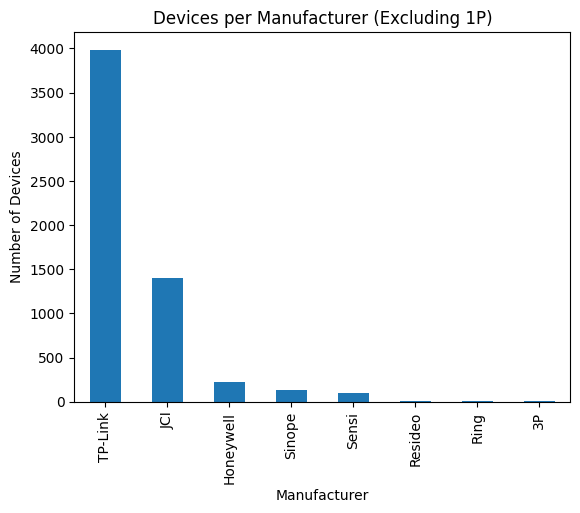

In [45]:
manufacturer_counts.plot(kind='bar', title='Devices per Manufacturer (Excluding 1P)')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Devices')
plt.show()

In [46]:
household_groups = filtered_data.groupby('household_id')['manufacturer'].unique()
single_manufacturer_households = household_groups[household_groups.apply(len) == 1]
print(single_manufacturer_households)

household_id
01HG9B5A1ZQ66EP09BHS5BCDKT         [3P]
01HGBG6VRJ216K0VA96K6E2SGM         [3P]
01HGK76CC9TQGEMQH812NFFXCC    [TP-Link]
01HGKA4TBQW7VDVS056KM4FBD2         [3P]
01HGPQVBGB45EAJY4H3S568EPB    [TP-Link]
                                ...    
01K4ZQCNZ8BDCEQSV994NW5MYY        [JCI]
01K4ZQZ1YRNW2NR0YD1EQBZZHA        [JCI]
01K4ZTFNEP8SQWG3ZZQ5N11XSF        [JCI]
01K52MDDPAKH9PATG4HSMCRZ2V        [JCI]
01K57548H6AB29YH81D192SZEW        [JCI]
Name: manufacturer, Length: 659, dtype: object


In [47]:
manufacturer_counts = filtered_data['manufacturer'].value_counts()
print(manufacturer_counts)

manufacturer
TP-Link      3986
JCI          1403
Honeywell     221
Sinope        134
Sensi          98
Resideo        10
Ring            9
3P              4
Name: count, dtype: int64


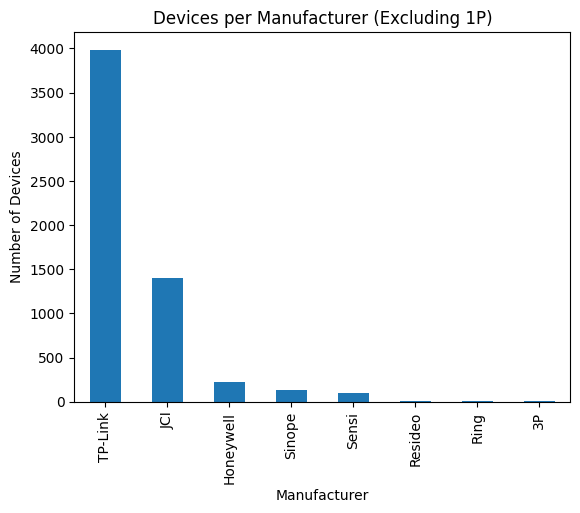

In [48]:
manufacturer_counts.plot(kind='bar', title='Devices per Manufacturer (Excluding 1P)')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Devices')
plt.show()

In [49]:
household_groups = filtered_data.groupby('household_id')['manufacturer'].unique()
single_manufacturer_households = household_groups[household_groups.apply(len) == 1]
print(single_manufacturer_households)

household_id
01HG9B5A1ZQ66EP09BHS5BCDKT         [3P]
01HGBG6VRJ216K0VA96K6E2SGM         [3P]
01HGK76CC9TQGEMQH812NFFXCC    [TP-Link]
01HGKA4TBQW7VDVS056KM4FBD2         [3P]
01HGPQVBGB45EAJY4H3S568EPB    [TP-Link]
                                ...    
01K4ZQCNZ8BDCEQSV994NW5MYY        [JCI]
01K4ZQZ1YRNW2NR0YD1EQBZZHA        [JCI]
01K4ZTFNEP8SQWG3ZZQ5N11XSF        [JCI]
01K52MDDPAKH9PATG4HSMCRZ2V        [JCI]
01K57548H6AB29YH81D192SZEW        [JCI]
Name: manufacturer, Length: 659, dtype: object


In [50]:
single_manufacturer_counts = single_manufacturer_households.apply(lambda x: x[0]).value_counts()
print(single_manufacturer_counts)

manufacturer
TP-Link      415
JCI          171
Honeywell     40
Sensi         21
Sinope         9
3P             3
Name: count, dtype: int64


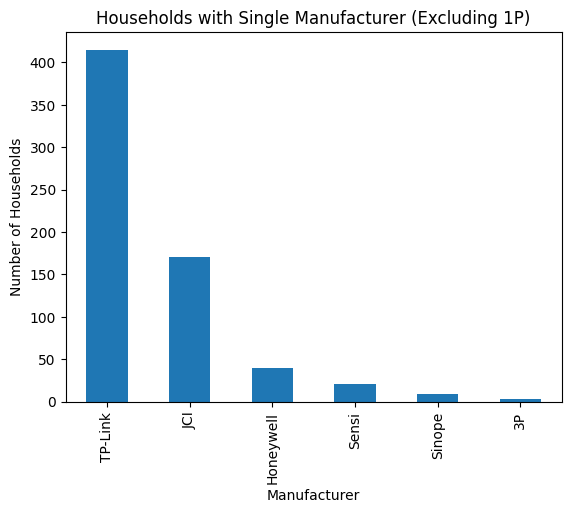

In [51]:
single_manufacturer_counts.plot(kind='bar', title='Households with Single Manufacturer (Excluding 1P)')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Households')
plt.show()

In [52]:
from sklearn.cluster import KMeans
import numpy as np

# Prepare data for clustering (e.g., household size, number of devices per manufacturer)
cluster_data = filtered_data.groupby('household_id').agg({
    'manufacturer': 'count',
    'asset_type': 'nunique'
}).reset_index()

# Normalize the data for clustering
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data[['manufacturer', 'asset_type']])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_data['Cluster'] = kmeans.fit_predict(cluster_data_scaled)

# Count the number of households in each cluster
cluster_counts = cluster_data['Cluster'].value_counts()

# Display the counts
print(cluster_counts)

Cluster
0    794
1    216
2      3
Name: count, dtype: int64


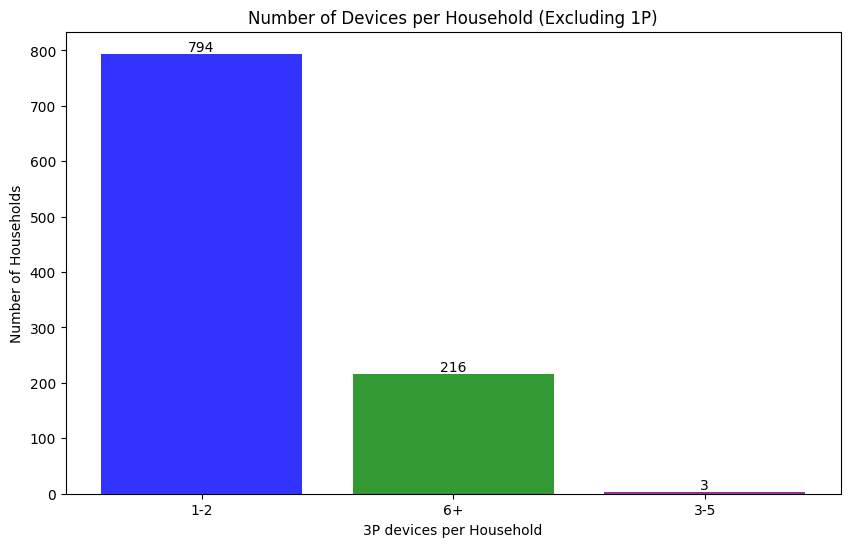

In [53]:
# Plot the number of households in each cluster
plt.figure(figsize=(10, 6))
bars = plt.bar(
    cluster_counts.index, 
    cluster_counts.values, 
    color=['blue', 'green', 'purple'], 
    alpha=0.8
)

# Add labels to the bars
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height() + 4, 
        str(bar.get_height()), 
        ha='center', 
        fontsize=10
    )

# Add axis labels and title
plt.xlabel('3P devices per Household')
plt.ylabel('Number of Households')
plt.title('Number of Devices per Household (Excluding 1P)')
plt.xticks(cluster_counts.index, ['1-2', '6+', '3-5'])
plt.show()
